In [1]:
# Step 1: Load the Titanic dataset
import pandas as pd
import seaborn as sns

#Load seaborn built-in Titanic-dataset.csv
df = sns.load_dataset('titanic')

print("Rows, Columns:", df.shape)
display(df.head(5))
display(df.info())


Rows, Columns: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None


Missing values in each column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Survival count:
survived
0    549
1    342
Name: count, dtype: int64

Survival rate:
survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


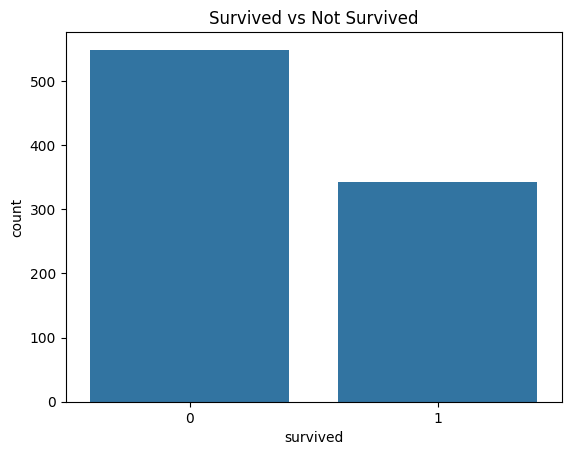

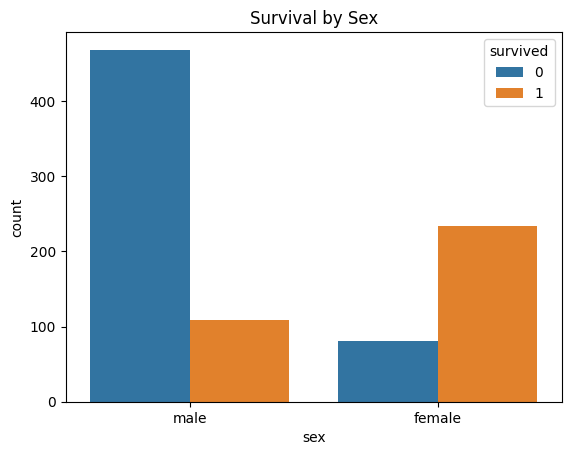

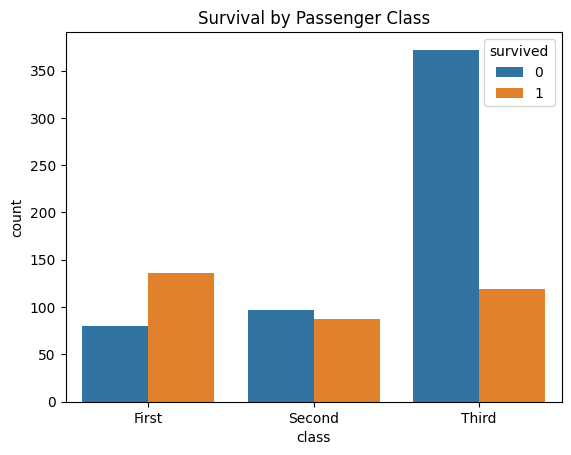

In [2]:
# Step 2: Basic Exploratory Data Analysis (EDA)

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nSurvival count:")
print(df['survived'].value_counts())

print("\nSurvival rate:")
print(df['survived'].value_counts(normalize=True) * 100)

# Quick visual: survival counts
import matplotlib.pyplot as plt
sns.countplot(x='survived', data=df)
plt.title('Survived vs Not Survived')
plt.show()

# Visual: survival distribution by sex
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Sex')
plt.show()

# Visual: survival distribution by class
sns.countplot(x='class', hue='survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()


In [3]:
# STEP 3: Data Cleaning & Preprocessing

# Keeping only useful columns
cols = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
data = df[cols].copy()

# Handling missing values
data['age'] = data['age'].fillna(data['age'].median())
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

# Encoding 'sex' column
data['sex'] = data['sex'].map({'male': 0, 'female': 1})

# One-hot encode 'embarked'
data = pd.get_dummies(data, columns=['embarked'], drop_first=True)

# Checking final cleaned data
print(data.head())
print("\nRemaining missing values:")
print(data.isnull().sum())


   survived  pclass  sex   age  sibsp  parch     fare  embarked_Q  embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True

Remaining missing values:
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked_Q    0
embarked_S    0
dtype: int64


In [4]:
# STEP 4: Splitting data + Building a  model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#  Spliting into features (X) and target (y)
X = data.drop('survived', axis=1)
y = data['survived']

#  Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.8100558659217877


Confusion Matrix:
[[90 15]
 [19 55]]


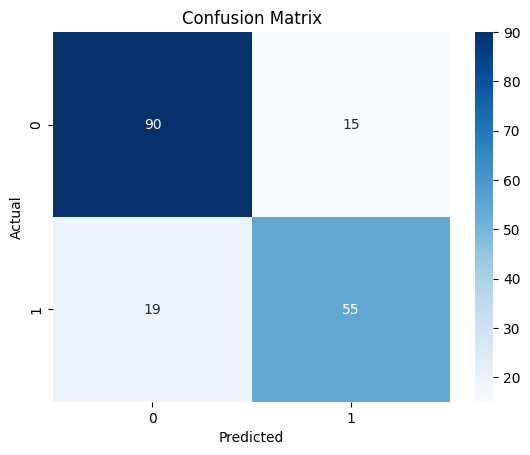


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [5]:
# STEP 5: Evaluation & Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Heatmap for visual clarity
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
